In [304]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random

# Path Specification for Dataset

In [305]:
path = "/content/drive/MyDrive/facebook-combined.txt"
path2= "/content/drive/MyDrive/net3.txt"

k = 10

In [306]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Read the graph dataset file

In [307]:
G = nx.read_edgelist(path, nodetype = int)  
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

for each in G.nodes():
        G.nodes[each]['type'] = 'person'
        G.nodes[each]['color'] = 'white'

print('num_nodes', num_nodes)
print('num_edeges',num_edges)

num_nodes 4039
num_edeges 88234


In [308]:
G.edges()

EdgeView([(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (0, 15), (0, 16), (0, 17), (0, 18), (0, 19), (0, 20), (0, 21), (0, 22), (0, 23), (0, 24), (0, 25), (0, 26), (0, 27), (0, 28), (0, 29), (0, 30), (0, 31), (0, 32), (0, 33), (0, 34), (0, 35), (0, 36), (0, 37), (0, 38), (0, 39), (0, 40), (0, 41), (0, 42), (0, 43), (0, 44), (0, 45), (0, 46), (0, 47), (0, 48), (0, 49), (0, 50), (0, 51), (0, 52), (0, 53), (0, 54), (0, 55), (0, 56), (0, 57), (0, 58), (0, 59), (0, 60), (0, 61), (0, 62), (0, 63), (0, 64), (0, 65), (0, 66), (0, 67), (0, 68), (0, 69), (0, 70), (0, 71), (0, 72), (0, 73), (0, 74), (0, 75), (0, 76), (0, 77), (0, 78), (0, 79), (0, 80), (0, 81), (0, 82), (0, 83), (0, 84), (0, 85), (0, 86), (0, 87), (0, 88), (0, 89), (0, 90), (0, 91), (0, 92), (0, 93), (0, 94), (0, 95), (0, 96), (0, 97), (0, 98), (0, 99), (0, 100), (0, 101), (0, 102), (0, 103), (0, 104), (0, 105), (0, 106), (0, 107), (0, 108), (0, 109), (0, 110)

# Top k degrees

In [309]:
deg = dict(G.degree())
sort_deg=sorted(deg.items(),key= lambda x:x[1],reverse=True)#sorting the degrees

# G = G.to_directed()#convert this graph to directed graph
# outdeg=dict(H.out_degree())#out degrees of node is stored in outdeg
# outdeg=sorted(outdeg.items(),key= lambda x:x[1],reverse=True)#sorting the outdegrees

# top k highest degree nodes 
topk = sort_deg[:k]
print('topk = ',topk)


topk =  [(107, 1045), (1684, 792), (1912, 755), (3437, 547), (0, 347), (2543, 294), (2347, 291), (1888, 254), (1800, 245), (1663, 235)]


In [310]:
def sum_to_x(n, x):
    values = [0.0, x] + list(np.random.uniform(low=0.0,high=x,size=n-1))
    values.sort()
    return [values[i+1] - values[i] for i in range(n)]

p = sum_to_x(10, 1)
print(p)

print(sum(p))

[0.12038164226673997, 0.017643105566523154, 0.25732112706191945, 0.009743122358674139, 0.08481407554580889, 0.15452873155155022, 0.2074958705122777, 0.004694702798067829, 0.07081142101355808, 0.07256620132488056]
1.0


In [311]:
foci_node_scores = {}

l = [40,50,60,70,80]
# random.seed(10)
# topk_news_scores = random.choices(l, k=10)

topk_news_scores = sum_to_x(k,1) # this list has to initialized from scores coming from model
print(topk_news_scores)

print(sum(topk_news_scores))
# for i in range()

# print(topk_news_scores)

topk_news_colors = ['red', 'black', 'purple', 'magenta', 'brown','pink', 'yellow', 'green', 'olive', 'orange']

[0.07671994377577207, 0.00593590495466656, 0.05203521472210093, 0.25016206110319295, 0.05590139314378295, 0.009423099372068755, 0.22089038617779977, 0.11434820358402453, 0.0542743425958816, 0.1603094505707099]
1.0


In [312]:
import seaborn as sns

In [313]:
def get_labels(g):
    dict1 = {}
    for each in g.nodes():
        dict1[each]=g.nodes[each]['threshold']
    return dict1

def get_size(G):
    arr=[]
    for each in G.nodes():
        if G.nodes[each]['type'] == 'foci':
            # pass
            arr.append(G.nodes[each]['threshold']*1000)
        else: 
            arr.append(20)

    return arr



def get_colors(G):
    c=[]
    for each in G.nodes():
        if G.nodes[each]['type'] == 'person':
            c.append(G.nodes[each]['color'])
        else:
            c.append(G.nodes[each]['color'])

    return c

def plot_graph(G):
    # nx.draw(G,labels=labeldict)
    # labeldict = get_labels(G)
    nodesize = get_size(G)
    color_arr = get_colors(G)
    # plt.rcParams['figure.figsize'] = (15, 15)
    plt.figure(figsize=(15,15))
    plt.style.use('fivethirtyeight')
    nx.draw(G,pos = nx.fruchterman_reingold_layout(G),
        # labels = labeldict,
        node_size=nodesize,
        node_color = color_arr,
        edge_color="gray",
        width=0.5, cmap=plt.cm.Blues)
    plt.show()

def bar_plot_graph(G):
    plt.figure(figsize = (7,7))
    color_count = {}

    for col in topk_news_colors:
        color_count[col] = 0
    
    print('color_count',color_count)
    for each in G.nodes():
        if G.nodes[each]['type'] == 'person':
            key = G.nodes[each]['color']
            color_count[key] = color_count[key] + 1

    plt.bar(list(color_count.keys()), list(color_count.values()), color = topk_news_colors,
        width = 0.4)

    plt.xlabel("Node Color ")
    plt.ylabel("No. of nodes")
    plt.title("Node color count after 20 iterations")
    plt.show()
        
def swap_interest_plot_graph(G,interest_change_list):
    plt.figure(figsize = (7,7))
    color_count = {}

    node = []
    prev_foci = []
    curr_foci = []
    print('interest_ca',interest_change_list)
    for each in range(len(interest_change_list)):
        node.append(interest_change_list[each][0])
        prev_foci.append(interest_change_list[each][1])
        curr_foci.append(interest_change_list[each][2])
    
    print('node',node)
    print('prev_foci',prev_foci)
    print('curr_foci',curr_foci)
    
    sns.lineplot(x = node, y = curr_foci, hue = prev_foci)



    plt.xlabel("Node whose interest changed ")
    plt.ylabel("curr foci node ")
    plt.title("Node following to which foci node after 20 iterations")
    plt.show()

def line_plot_graph(G):
    plt.figure(figsize = (7,7))
    color_count = {}

    for col in topk_news_colors:
        color_count[col] = 0
    
    print('color_count',color_count)
    for each in G.nodes():
        if G.nodes[each]['type'] == 'person':
            key = G.nodes[each]['color']
            color_count[key] = color_count[key] + 1

    plt.bar(list(color_count.keys()), list(color_count.values()), color = topk_news_colors,
        width = 0.4)

    plt.xlabel("Node Color ")
    plt.ylabel("No. of nodes")
    plt.title("Node color count after 20 iterations")
    plt.show()

                   

# Plot Graph

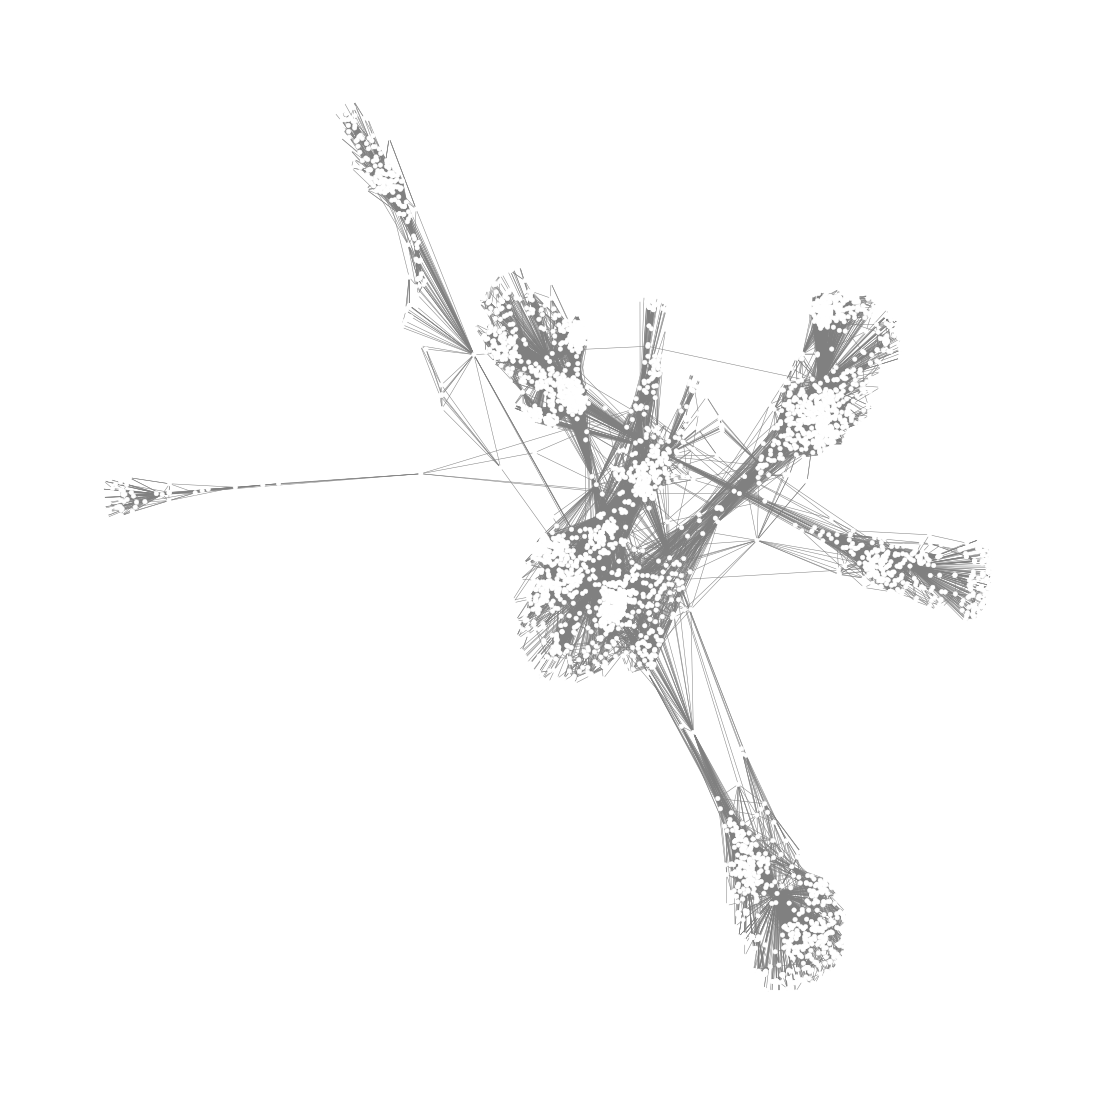

In [314]:
plot_graph(G)

In [315]:
def add_foci_nodes(G,k): 
    for i in range(k):
        G.add_node(str(num_nodes+i),type='foci')
    return G

def get_foci_nodes(G):
    foci_nodes=[]
    for i in G.nodes():
        if G.nodes[i]['type']=='foci':
            foci_nodes.append(i)
    return foci_nodes
   
def get_person_nodes(G):
    person_nodes=[]
    for i in G.nodes():
        if G.nodes[i]['type']=='person':
            person_nodes.append(i)
    return person_nodes

In [316]:
def consume_news_topk(G,k,topk):    
    for i in range(k):
        G.add_node(str(num_nodes+i),type='foci')
        G.nodes[str(num_nodes+i)]['threshold']= topk_news_scores[i] #threshold is set as degree of each node for foci nodes initially
        G.add_edge(str(num_nodes+i),topk[i][0])
        G.nodes[str(num_nodes+i)]['rank']=i+1
        G.nodes[str(num_nodes+i)]['color'] = topk_news_colors[i]
    return G

# Add foci nodes and assign news to those foci nodes

In [317]:
G = consume_news_topk(G,k,topk)

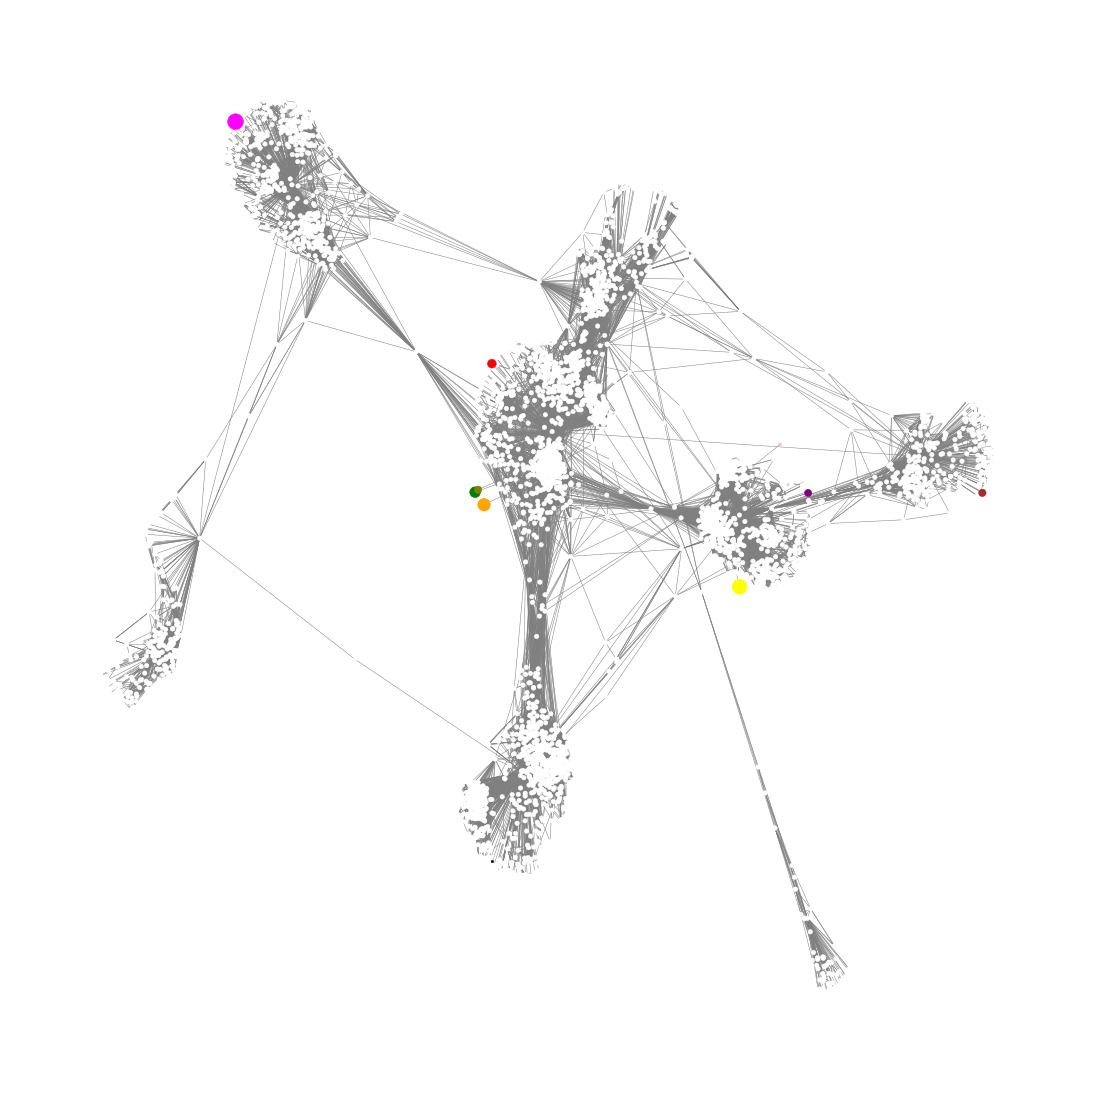

In [318]:
plot_graph(G)

# Initialize person interest scores randomly
# Initiailze tmp scores to gather changes from all foci nodes

In [319]:
foci_nodes = get_foci_nodes(G)

# print('foci_nodes',foci_nodes)

for each in G.nodes():

    if G.nodes[each]['type'] == 'person':
        interest = sum_to_x(k,1)
        # print('interest',interest)
        # print('sim',sum(interest))
        tmp_interest = [0]*k
        interest_score = dict(zip(foci_nodes, interest))
        tmp_score = dict(zip(foci_nodes,tmp_interest))
        # print("interest_score",interest_score)

        G.nodes[each]['interest_score'] = interest_score
        G.nodes[each]['tmp_score'] = tmp_score

In [320]:
def update_colors(G):
    for each in G.nodes():
        if G.nodes[each]['type'] == 'person':
            interest_score_dict = G.nodes[each]['interest_score']
            
            # print('interest_score_dict',interest_score_dict)

            if len(interest_score_dict) == 0:
                pass
                ''' do nothing '''
            elif len(interest_score_dict) == 1:

                fnode = max(interest_score_dict, key= lambda x: interest_score_dict[x])
                G.nodes[each]['color'] =  G.nodes[fnode]['color']

            else:
                fnode = max(interest_score_dict, key= lambda x: interest_score_dict[x])
                # print('fnode',fnode)
                G.nodes[each]['color'] =  G.nodes[fnode]['color']


    return G

In [321]:
G = update_colors(G)

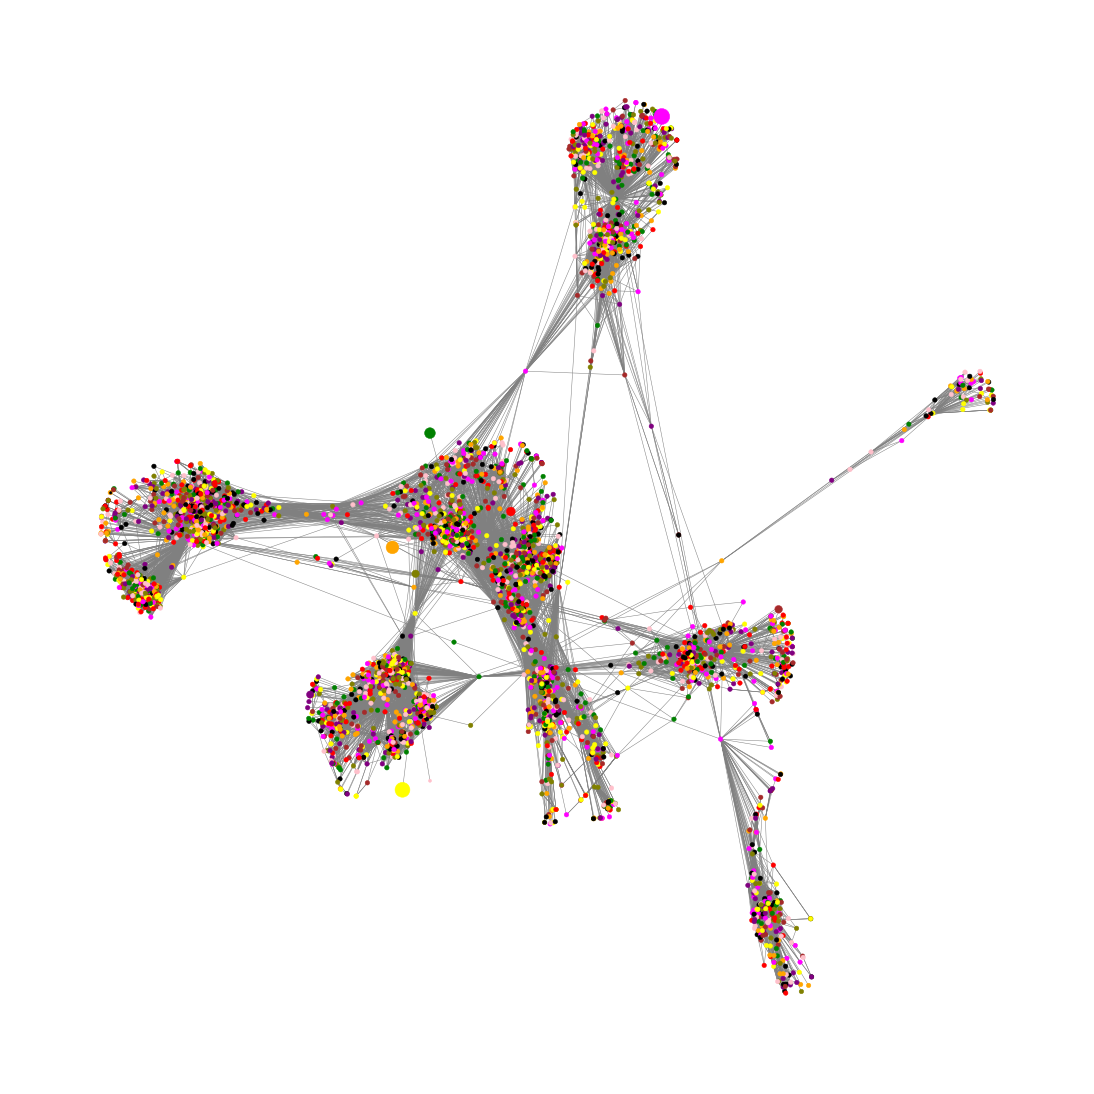

In [322]:
plot_graph(G)

In [323]:
# l = []
# for each in G.nodes():
#     if G.nodes[each]['type'] == 'foci':
#         # print(G.nodes[each]['threshold'])
#         l.append(G.nodes[each]['threshold'])

# print(sum(l))

# Calculate Interest for each node with respect to foci nodes

In [324]:
def calculate_interest(G,each,fnode):
    distance = nx.shortest_path_length(G,each,fnode)
    # print('distance',distance)
    fnode_interest = G.nodes[fnode]['threshold']
    person_interest_dict = G.nodes[each]['interest_score']
    preson_foci_interest = G.nodes[each]['interest_score'][fnode]
    tmp_score = G.nodes[each]['tmp_score']
    interest_score = ( fnode_interest * preson_foci_interest ) / distance
    for key in person_interest_dict:
        if key == fnode:
            tmp_score[key] += interest_score
        else: 
            tmp_score[key] -= (interest_score/9)
    # print('tmp_scores',tmp_score)
    G.nodes[each]['tmp_score'] = tmp_score

    return G

# updating interest score

In [325]:
def update_interest_score(G):
    # final_updates = {}
    interest_change_node = []
    for each in G.nodes():
        if G.nodes[each]['type'] == 'person':
            interest_score = G.nodes[each]['interest_score']
            tmp_score = G.nodes[each]['tmp_score']
            prev_fnode = max(interest_score, key= lambda x: interest_score[x])
            prev_color = G.nodes[prev_fnode]['color']   
            for key in interest_score:
                if key in tmp_score:
                    interest_score[key] = interest_score[key] + tmp_score[key]
                else:
                    pass
            # print('interest_score',interest_score)
            curr_fnode = max(interest_score, key= lambda x: interest_score[x])
            curr_color = G.nodes[curr_fnode]['color']
            G.nodes[each]['interest_score'] = interest_score
            if prev_color != curr_color:
                interest_change_node.append((each,prev_fnode,curr_fnode))
    return G,interest_change_node

# Spread News

In [326]:
foci_nodes = get_foci_nodes(G)
# print('foci_nodes',foci_nodes)
def spread_news(G):
    for each in G.nodes():
        if G.nodes[each]['type'] == 'person':
            person_temp_scores = {}
            for fnode in foci_nodes:
                G = calculate_interest(G,each,fnode)
        # break

    return G


In [327]:
def no_of_nodes_following_news(G):
  foci_nodes = get_foci_nodes(G)
  count_store={}
  for i in foci_nodes:
    count_store[i]=0
  person_nodes= get_person_nodes(G)
  for i in person_nodes:
    if len(G.nodes[i]['interest_score']) != 0:
        max_index=max(G.nodes[i]['interest_score'],key=lambda x:G.nodes[i]['interest_score'][x])
        count_store[max_index]+=1
  return count_store

In [328]:
#assuming both dictionary have same keys
def compare_dicts(dict1,dict2):
  for i in dict1.keys():
    if(dict1[i]!=dict2[i]):
      return False
  return True

# update colors according to the final interest score

In [329]:
def update_colors(G):
    for each in G.nodes():
        if G.nodes[each]['type'] == 'person':
            interest_score_dict = G.nodes[each]['interest_score']
            
            # print('interest_score_dict',interest_score_dict)

            if len(interest_score_dict) == 0:
                pass
                ''' do nothing '''
            elif len(interest_score_dict) == 1:

                fnode = max(interest_score_dict, key= lambda x: interest_score_dict[x])
                G.nodes[each]['color'] =  G.nodes[fnode]['color']

            else:
                fnode = max(interest_score_dict, key= lambda x: interest_score_dict[x])
                # print('fnode',fnode)
                G.nodes[each]['color'] =  G.nodes[fnode]['color']


    return G

# Keep Iterating  for each nodes until their interest scores are not changing

In [330]:
count_interest_change = []
rounds=1
while(True):
        before=no_of_nodes_following_news(G)
        G = spread_news(G)
        G,interest_change_list = update_interest_score(G)
        after=no_of_nodes_following_news(G)
        # print('frequency of person following news',after)
        # print('interest_change_list',interest_change_list)
        count_interest_change.append(len(interest_change_list))
        if(compare_dicts(before,after)==True):
        break
        print('Finished round',rounds)
        rounds=rounds+1

    # if rounds % 20 == 2:
    #     G = update_colors(G)
    #     plot_graph(G)
        # swap_interest_plot_graph(G,interest_change_list)

Finished round 1
Finished round 2
Finished round 3
Finished round 4
Finished round 5
Finished round 6
Finished round 7
Finished round 8
Finished round 9
Finished round 10
Finished round 11
Finished round 12
Finished round 13
Finished round 14
Finished round 15
Finished round 16
Finished round 17
Finished round 18
Finished round 19
Finished round 20
Finished round 21
Finished round 22
Finished round 23
Finished round 24
Finished round 25
Finished round 26
Finished round 27
Finished round 28
Finished round 29
Finished round 30
Finished round 31
Finished round 32
Finished round 33
Finished round 34
Finished round 35
Finished round 36
Finished round 37
Finished round 38
Finished round 39
Finished round 40
Finished round 41
Finished round 42
Finished round 43
Finished round 44
Finished round 45
Finished round 46
Finished round 47
Finished round 48
Finished round 49
Finished round 50
Finished round 51
Finished round 52
Finished round 53
Finished round 54
Finished round 55
Finished round 56
F

interest_ca [(1230, '4048', '4045'), (2038, '4042', '4048'), (2738, '4045', '4042')]
node [1230, 2038, 2738]
prev_foci ['4048', '4042', '4045']
curr_foci ['4045', '4048', '4042']


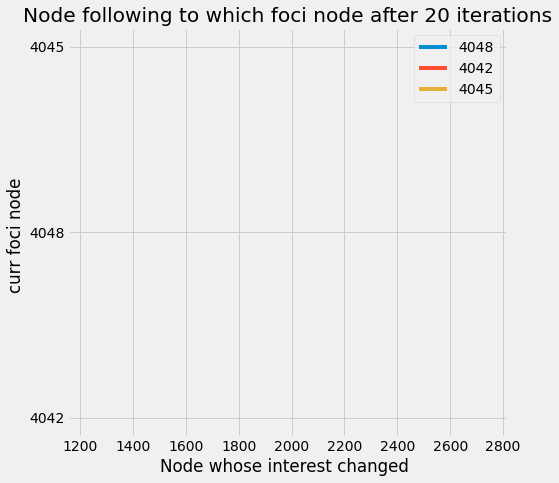

In [331]:
# swap_interest_plot_graph(G,interest_change_list)

In [332]:
def line_plot(G):
    plt.figure(figsize = (7,7))
    plt.plot(list(range(len(count_interest_change))),count_interest_change)  # Plot the chart
    plt.xlabel('Number of iterations')
    plt.ylabel('Number of peoples whose interests are changing')
    plt.show()  

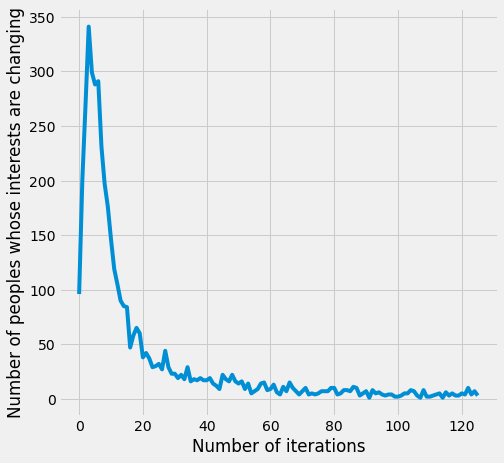

In [333]:
line_plot(G)    

In [334]:
G = update_colors(G)

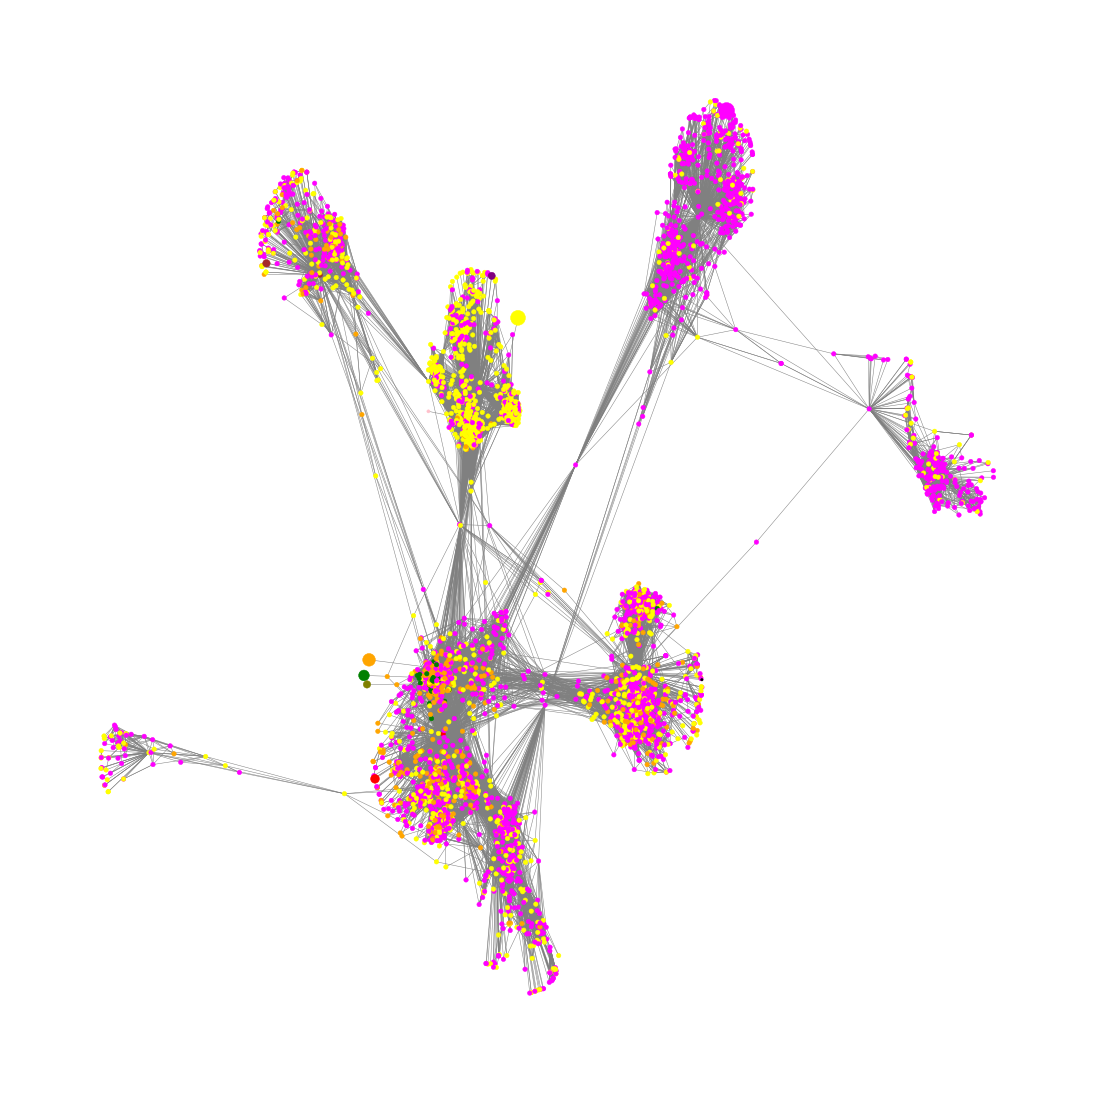

In [335]:
plot_graph(G)

color_count {'red': 0, 'black': 0, 'purple': 0, 'magenta': 0, 'brown': 0, 'pink': 0, 'yellow': 0, 'green': 0, 'olive': 0, 'orange': 0}


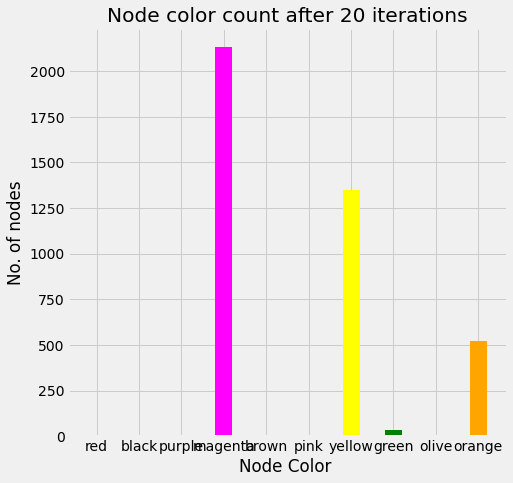

In [336]:
bar_plot_graph(G)